In [ ]:
import torch
from moondream import MoondreamModel, MoondreamConfig
from safetensors.torch import load_file
from dataset import load_object_detection_dataset
from visualization_utils import plot_sample, plot_prediction
from moondream_functions import detect
device = "cuda" if torch.cuda.is_available() else "cpu"

safetensors_path = "gpro_model_4.safetensors"
base_model_path = "model.safetensors"
original_model = MoondreamModel(config=MoondreamConfig)
original_model.to(device)

model = MoondreamModel(config=MoondreamConfig)
model.to(device)

state_dict = load_file(safetensors_path)
base_state_dict = load_file(base_model_path)    
original_model.load_state_dict(base_state_dict)


model.load_state_dict(state_dict)




In [16]:
val_ds = load_object_detection_dataset("test")


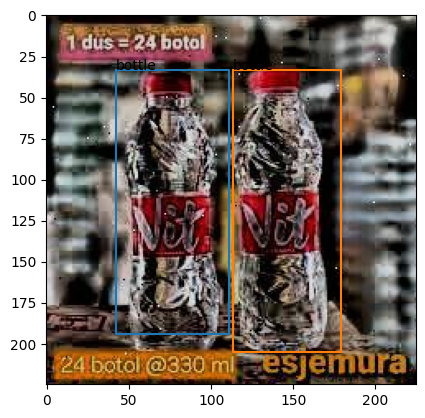

In [20]:
idx = 211

sample = val_ds[idx]

plot_sample(sample)



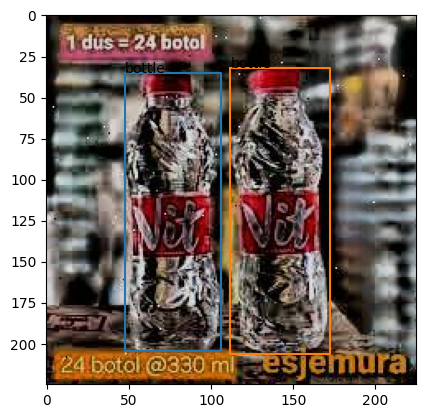

In [21]:
predictions = detect(model, sample[0], sample[1], None, temperature=0.)

plot_prediction(predictions, sample)

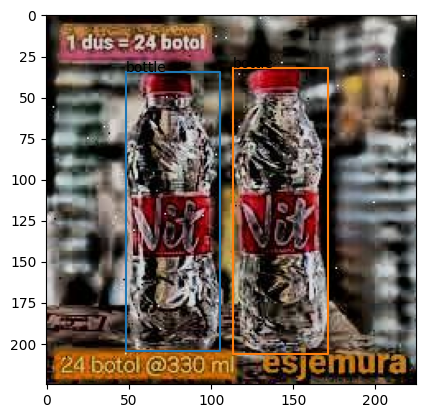

In [23]:
baseline_predictions = detect(original_model, sample[0], sample[1], None, temperature=0.)

plot_prediction(baseline_predictions, sample)

In [25]:
predictions['objects'], baseline_predictions['objects']

([{'x_min': 0.21359872817993164,
   'y_min': 0.1541072130203247,
   'x_max': 0.46804189682006836,
   'y_max': 0.9064396619796753,
   'x_logprob': tensor(-1.1953, device='cuda:0', dtype=torch.bfloat16),
   'y_logprob': tensor(-1.9609, device='cuda:0', dtype=torch.bfloat16),
   'w_logprob': tensor(-1.8047, device='cuda:0', dtype=torch.bfloat16),
   'h_logprob': tensor(-0.8555, device='cuda:0', dtype=torch.bfloat16)},
  {'x_min': 0.5037494152784348,
   'y_min': 0.14181962609291077,
   'x_max': 0.7599224597215652,
   'y_max': 0.9148209989070892,
   'x_logprob': tensor(-1.4844, device='cuda:0', dtype=torch.bfloat16),
   'y_logprob': tensor(-1.7812, device='cuda:0', dtype=torch.bfloat16),
   'w_logprob': tensor(-1.6328, device='cuda:0', dtype=torch.bfloat16),
   'h_logprob': tensor(-0.7734, device='cuda:0', dtype=torch.bfloat16)}],
 [{'x_min': 0.21359872817993164,
   'y_min': 0.1541072130203247,
   'x_max': 0.46804189682006836,
   'y_max': 0.9064396619796753,
   'x_logprob': tensor(-1.1953, 